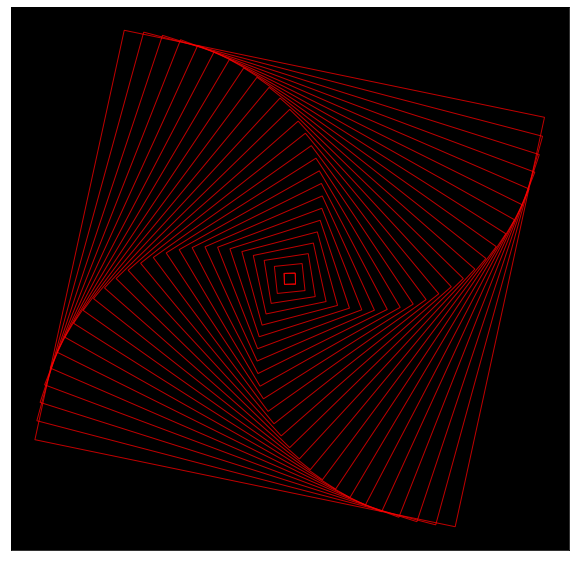

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import animation
from matplotlib import transforms
from IPython.display import HTML

  
edge_len = np.arange(.2,8,.3)
center=np.array([5,5])    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_facecolor('black')

def animate(frame, blit = False):
    if frame<len(edge_len):
        h_size = edge_len[frame]/2
        lower_left = center - np.array(h_size, h_size)
        rect = patches.Rectangle(lower_left, edge_len[frame], edge_len[frame])
        rect.set(facecolor="none", alpha=.75)
        rect.set(edgecolor="red")
        rect.set_antialiased(True)
        ax.add_patch(rect)
    elif frame>=len(edge_len) and frame<=len(edge_len)*2:
        i = frame-len(edge_len)
#         deg = i * 1.85
        deg = i * 3

        r_arr = ax.get_children()[i:len(edge_len)+1]
        transform=transforms.Affine2D().rotate_deg_around(*center, deg)+ax.transData
        for j in range(len(r_arr)):
            r_arr[j].set_transform(transform)

        

anim = animation.FuncAnimation(fig, animate, frames=len(edge_len)*3, interval = 50, repeat = False)
# HTML(anim.to_html5_video())
anim.save('..\img\square_rotation.gif', writer='imagemagick')